<a href="https://colab.research.google.com/github/theRedVillain/OIBSIP_task_3/blob/main/Oases_Infobyte_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Required Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Importing the Datasets

In [2]:
ue_india = pd.read_csv('/content/Unemployment in India.csv')
ue_rate = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

Understanding the Data


In [3]:
ue_india.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
ue_rate.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
ue_india.shape

(768, 7)

In [6]:
ue_rate.shape

(267, 9)

In [7]:
# checking for null and duplicate values

ue_india.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
ue_rate.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
ue_india.duplicated().sum()

27

In [10]:
ue_rate.duplicated().sum()

0

In [11]:
ue_india.drop(index=ue_india[ue_india['Region'].isnull()].index , inplace = True)

In [12]:
ue_india.shape

(740, 7)

In [13]:
ue_india.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [14]:
ue_rate.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [15]:
ue_india.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [16]:
ue_rate.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [17]:
ue_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [18]:
ue_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [19]:
# cleaning the column names
ue_india.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [20]:
col_names = []
for i in ue_india.columns:
  col_names.append(i.strip())

In [21]:
col_names

['Region',
 'Date',
 'Frequency',
 'Estimated Unemployment Rate (%)',
 'Estimated Employed',
 'Estimated Labour Participation Rate (%)',
 'Area']

In [22]:
col_names[-4:-1] = ['Unemp_rate','Employed','LabourParticipation_rate']

In [23]:
ue_india.columns = col_names

In [139]:
ue_rate.columns = ['Region','Date','Frequency','Unemp_rate','Employed','LabourParticipation_rate','Demographic','Lat','Long','Month','Year']

In [140]:
ue_rate.sample(10)

,Region,Date,Frequency,Unemp_rate,Employed,LabourParticipation_rate,Demographic,Lat,Long,Month,Year
166,Odisha,2020-08-31,M,1.42,14154039,39.96,East,20.9517,85.0985,August,2020
250,Uttarakhand,2020-04-30,M,6.48,2720115,33.23,North,30.0668,79.0193,April,2020
171,Puducherry,2020-03-31,M,1.20,421028,34.49,South,11.9416,79.8083,March,2020
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.7400,April,2020
29,Bihar,2020-10-31,M,9.82,25693252,35.70,East,25.0961,85.3131,October,2020
175,Puducherry,2020-07-31,M,15.47,386563,36.64,South,11.9416,79.8083,July,2020
54,Goa,2020-05-31,M,21.25,378244,37.36,West,15.2993,74.1240,May,2020
227,Tripura,2020-01-31,M,32.67,1508130,69.69,Northeast,23.9408,91.9882,January,2020
226,Telangana,2020-10-31,M,2.86,17578739,56.58,South,18.1124,79.0193,October,2020
253,Uttarakhand,2020-07-31,M,12.38,2938552,38.07,North,30.0668,79.0193,July,2020


In [142]:
total_data = pd.concat([ue_india[['Region','Date','Unemp_rate','Employed','LabourParticipation_rate','Month','Year']],ue_rate[['Region','Date','Unemp_rate','Employed','LabourParticipation_rate','Month','Year']]],ignore_index = True)
total_data

,Region,Date,Unemp_rate,Employed,LabourParticipation_rate,Month,Year
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,May,2019
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,June,2019
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,July,2019
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,August,2019
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,September,2019
...,...,...,...,...,...,...,...
1002,West Bengal,2020-06-30,7.29,30726310.0,40.39,June,2020
1003,West Bengal,2020-07-31,6.83,35372506.0,46.17,July,2020
1004,West Bengal,2020-08-31,14.87,33298644.0,47.48,August,2020
1005,West Bengal,2020-09-30,9.35,35707239.0,47.73,September,2020


In [143]:
ue_india['Date'] = ue_india['Date'].astype(np.datetime64)

<ipython-input-143-ab2434c2bd20>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  ue_india['Date'] = ue_india['Date'].astype(np.datetime64)


In [144]:
ue_india['Frequency'] = ue_india['Frequency'].str.strip()

In [145]:
ue_india['Frequency'].value_counts()

Monthly    740
Name: Frequency, dtype: int64

In [146]:
ue_india['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [147]:
ue_india['Date'].describe()

<ipython-input-147-8d6fe710d47e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ue_india['Date'].describe()


count                     740
unique                     14
top       2019-10-31 00:00:00
freq                       55
first     2019-05-31 00:00:00
last      2020-06-30 00:00:00
Name: Date, dtype: object

In [148]:
ue_india.sample(10)

,Region,Date,Frequency,Unemp_rate,Employed,LabourParticipation_rate,Area,Month,Year
87,Gujarat,2019-12-31,Monthly,3.46,13877825.0,51.51,Rural,December,2019
507,Himachal Pradesh,2020-05-31,Monthly,50.00,134868.0,43.55,Urban,May,2020
519,Jharkhand,2019-05-31,Monthly,17.23,2404033.0,43.25,Urban,May,2019
104,Haryana,2020-03-31,Monthly,23.92,4366148.0,41.40,Rural,March,2020
486,Haryana,2019-10-31,Monthly,21.04,2821456.0,42.58,Urban,October,2019
505,Himachal Pradesh,2020-03-31,Monthly,26.44,221432.0,48.74,Urban,March,2020
345,West Bengal,2019-05-31,Monthly,6.02,23452875.0,46.41,Rural,May,2019
704,Tripura,2019-11-30,Monthly,27.15,427700.0,62.14,Urban,November,2019
303,Telangana,2020-06-30,Monthly,19.30,8891181.0,58.97,Rural,June,2020
557,Kerala,2020-03-31,Monthly,9.14,4079775.0,33.24,Urban,March,2020


Average Unemployment Rate of the States
(Top 10)

In [149]:
avg_ue_rate = total_data.groupby('Region').agg({
    'Unemp_rate':'mean'
}).sort_values(by= 'Unemp_rate',ascending = False).head(10)

avg_ue_rate

,Unemp_rate
Region,
Tripura,27.483158
Haryana,26.597368
Jharkhand,20.309737
Bihar,19.063684
Himachal Pradesh,17.888947
Delhi,17.000263
Jammu & Kashmir,16.275333
Chandigarh,15.991667
Rajasthan,14.534474


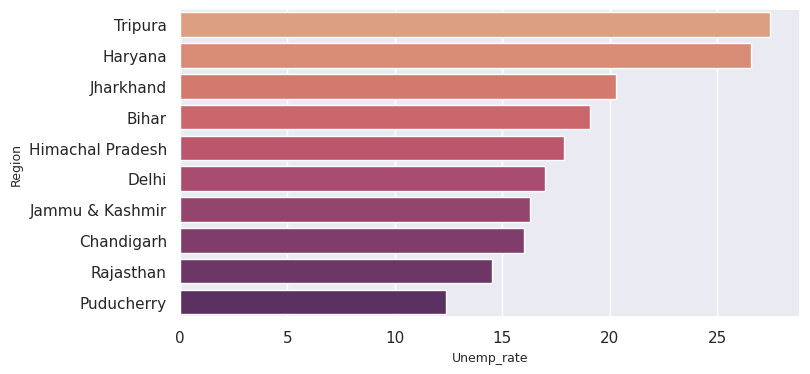

In [150]:
temp_df = avg_ue_rate.reset_index()
plt.figure(figsize = (8,4))
sns.barplot(y = 'Region' , x = 'Unemp_rate' , data = temp_df , palette = 'flare')
plt.show()

Average Unemployent Rate (Area Wise)

In [32]:
ue_rate_by_area = ue_india.groupby('Area').agg({
    'Unemp_rate':'mean'
}).sort_values(by= 'Unemp_rate',ascending = False)

ue_rate_by_area

,Unemp_rate
Area,
Urban,13.166614
Rural,10.324791


array([<Axes: ylabel='Unemp_rate'>], dtype=object)

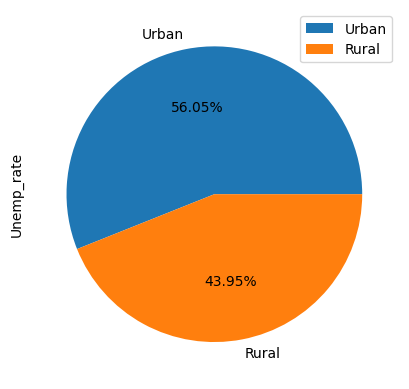

In [33]:
ue_rate_by_area.plot(kind = 'pie' , subplots = True , autopct = '%.2f%%')

Average Employed(Top 10)

In [151]:
total_data.groupby('Region').agg({
    'Employed':'mean'
}).sort_values(by= 'Employed',ascending = False).head(10)

,Employed
Region,
Uttar Pradesh,3.531324e+07
Maharashtra,2.504666e+07
West Bengal,2.143712e+07
Bihar,1.532425e+07
Tamil Nadu,1.482701e+07
Gujarat,1.438326e+07
Madhya Pradesh,1.406360e+07
Karnataka,1.355051e+07
Rajasthan,1.259125e+07


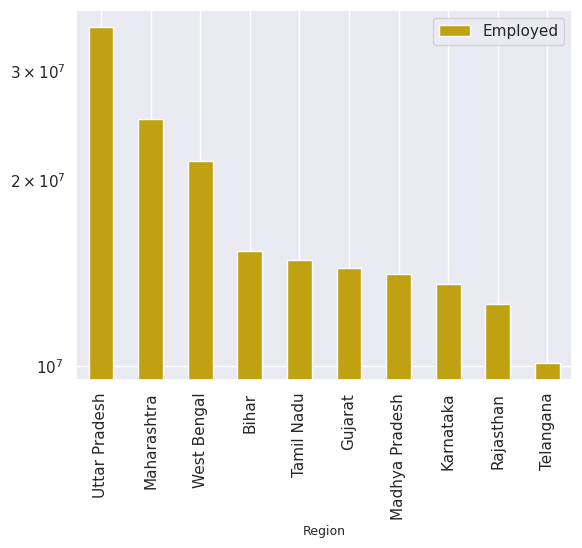

In [152]:
total_data.groupby('Region').agg({
    'Employed':'mean'
}).sort_values(by= 'Employed',ascending = False).head(10).plot(kind = 'bar',logy = True, color = '#BFA111')
plt.show()

Average Employed (Area Wise)

In [36]:
ue_india.groupby('Area').agg({
    'Employed':'mean'
}).sort_values(by= 'Employed',ascending = False)

,Employed
Area,
Rural,1.019285e+07
Urban,4.388626e+06


array([<Axes: ylabel='Employed'>], dtype=object)

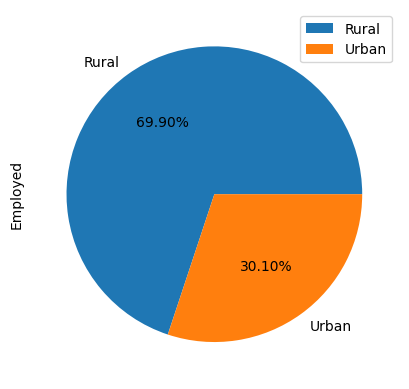

In [37]:
ue_india.groupby('Area').agg({
    'Employed':'mean'
}).sort_values(by= 'Employed',ascending = False).plot(kind = 'pie',subplots = True , autopct = '%.2f%%')

Average Estimated Labour Participation (Region Wise)

In [153]:
total_data.groupby('Region').agg({
    'LabourParticipation_rate':'mean'
}).sort_values(by= 'LabourParticipation_rate',ascending = False).head(10)

,LabourParticipation_rate
Region,
Tripura,60.777632
Meghalaya,57.831622
Telangana,53.520789
Sikkim,45.969600
Gujarat,45.940263
West Bengal,45.349211
Assam,44.487778
Himachal Pradesh,43.177368
Haryana,42.569474


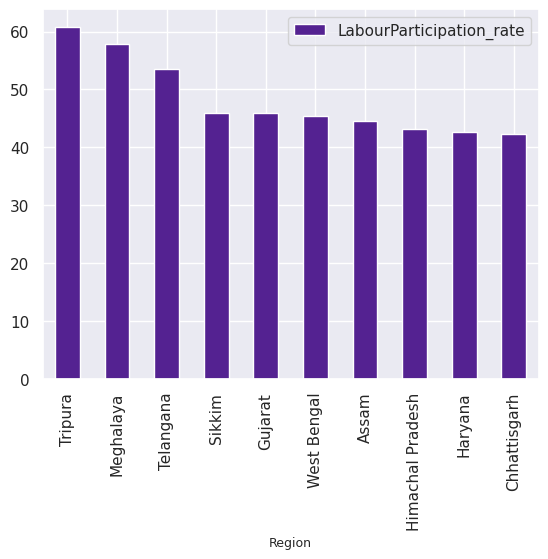

In [155]:
total_data.groupby('Region').agg({
    'LabourParticipation_rate':'mean'
}).sort_values(by= 'LabourParticipation_rate',ascending = False).head(10).plot(kind= 'bar',color = '#542291')
plt.show()

Average Estimated Labour Participation (Area Wise)

In [40]:
ue_india.groupby('Area').agg({
    'LabourParticipation_rate':'mean'
}).sort_values(by= 'LabourParticipation_rate',ascending = False)

,LabourParticipation_rate
Area,
Rural,44.464819
Urban,40.901365


array([<Axes: ylabel='LabourParticipation_rate'>], dtype=object)

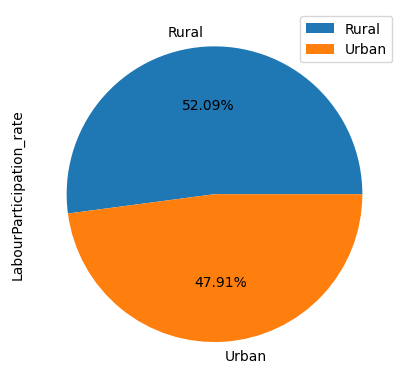

In [41]:
ue_india.groupby('Area').agg({
    'LabourParticipation_rate':'mean'
}).sort_values(by= 'LabourParticipation_rate',ascending = False).plot(kind = 'pie',subplots= True ,autopct = '%.2f%%')

In [42]:
ue_india['Month'] = ue_india['Date'].dt.month_name()

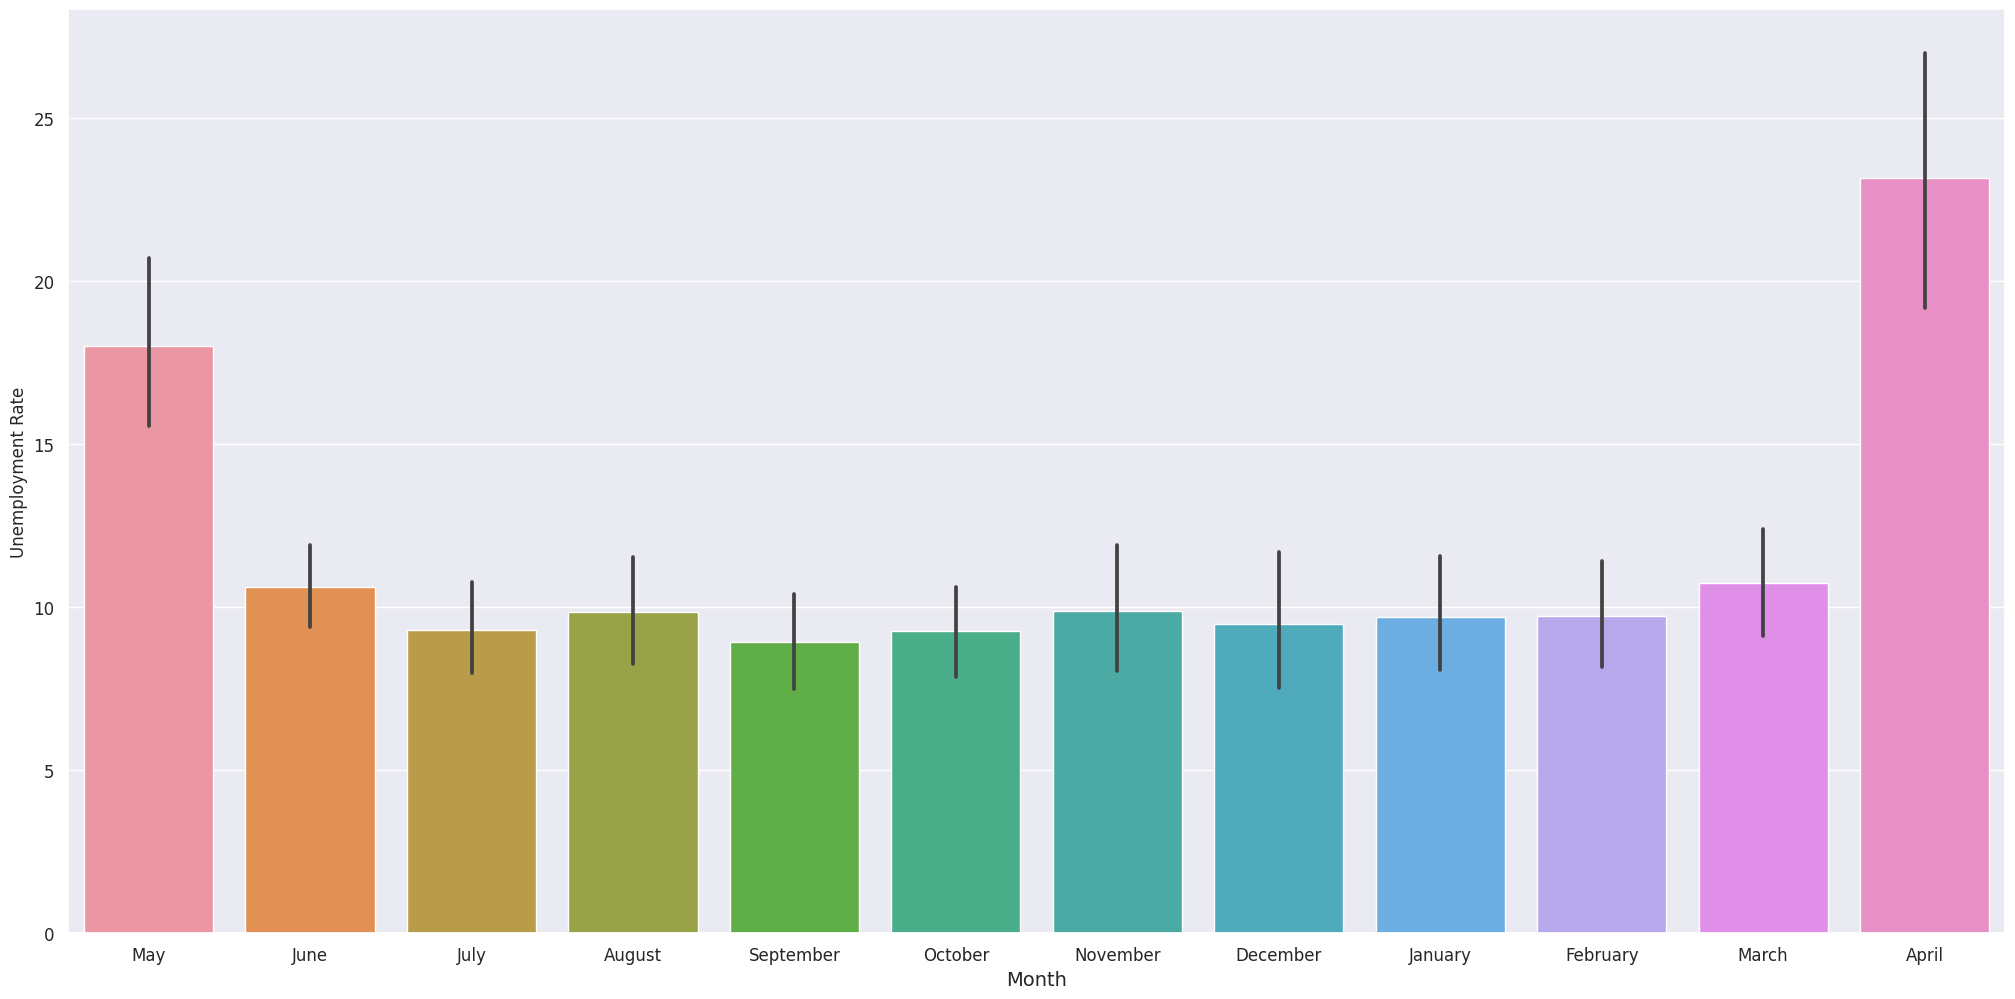

In [156]:
plt.figure(figsize = (25,12))
sns.barplot(x = 'Month' , y= 'Unemp_rate' , data = total_data)
plt.tick_params(axis='both', which='both', labelsize=12)
plt.xlabel('Month',size = 14)
plt.ylabel('Unemployment Rate',size = 12)
plt.show()

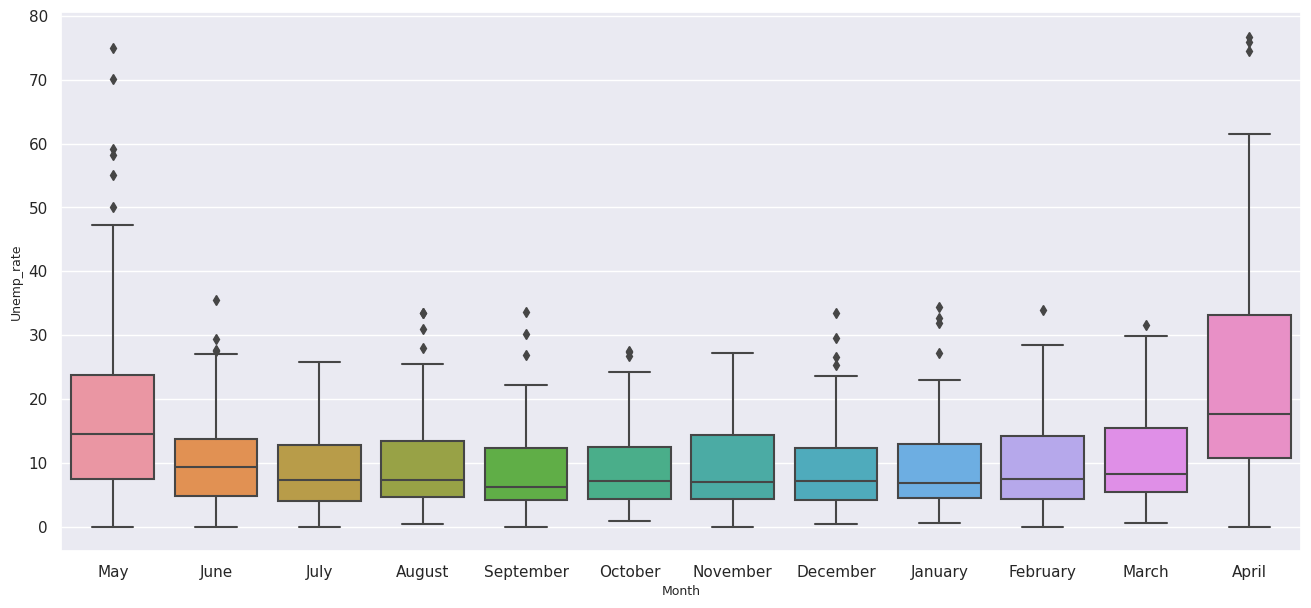

In [157]:
plt.figure(figsize = (16,7))
sns.boxplot(x = 'Month',y = 'Unemp_rate', data = total_data)
plt.show()

In [46]:
ue_india['Year']= ue_india['Date'].dt.year

In [47]:
ue_india.sample(3)

,Region,Date,Frequency,Unemp_rate,Employed,LabourParticipation_rate,Area,Month,Year
386,Andhra Pradesh,2020-06-30,Monthly,5.86,4954389.0,37.61,Urban,June,2020
51,Chhattisgarh,2020-04-30,Monthly,0.00,6534321.0,39.43,Rural,April,2020
608,Odisha,2019-11-30,Monthly,2.23,2594469.0,41.71,Urban,November,2019


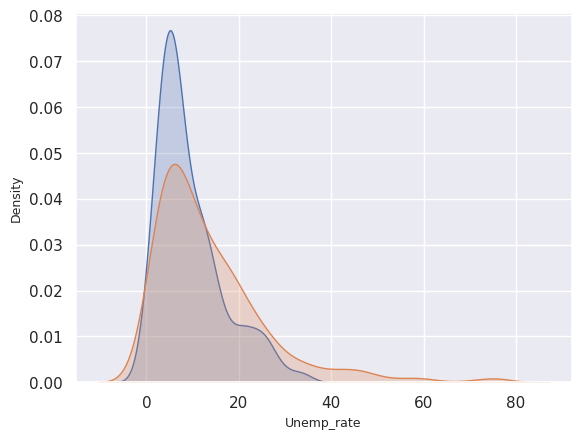

In [162]:
sns.kdeplot(data = total_data.query("Year == 2019") , x = 'Unemp_rate',fill = True)
sns.kdeplot(data = total_data.query("Year == 2020") , x = 'Unemp_rate',fill = True)
plt.show()

In [49]:
ue_india['Year'].value_counts()

2019    430
2020    310
Name: Year, dtype: int64

In [50]:
# We can see that even though more people were affected in the year 2019 but higher unemployment rates
# were seen in the following year of 2020

<Axes: >

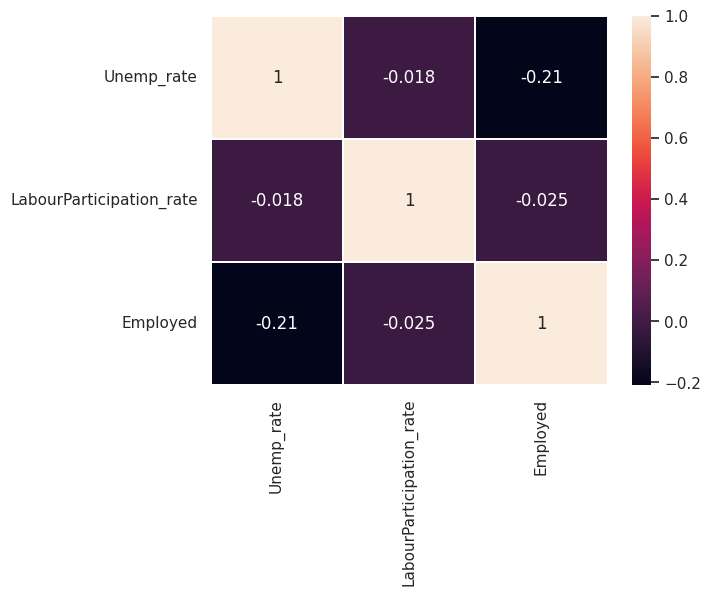

In [166]:
sns.heatmap(total_data[['Unemp_rate','LabourParticipation_rate','Employed']].corr() , annot = True , linewidth = 0.2)

In [52]:
# There is no correlation between any of the features .

Sorting the Unemp_rate By Year and By Month

In [168]:
y_m_rate = total_data.groupby(['Year','Month']).agg({
    'Unemp_rate':'mean'
},as_index = False).sort_values(by = 'Unemp_rate',ascending = False)

y_m_rate.sort_index(level = 0)

Unemp_rate
Year Month                
2019 August       9.637925
     December     9.497358
     July         9.033889
     June         9.303333
     May          8.874259
     November     9.868364
     October      9.900909
     September    9.051731
2020 April       23.167013
     August      10.313333
     February     9.734810
     January      9.702532
     July         9.834444
     June        11.555584
     March       10.728608
     May         24.310769
     October      8.026296
     September    8.705926

In [54]:
# In 2020 Maximum Unemployment Rate was seen in the month of may and in 2019 it was seen in October.

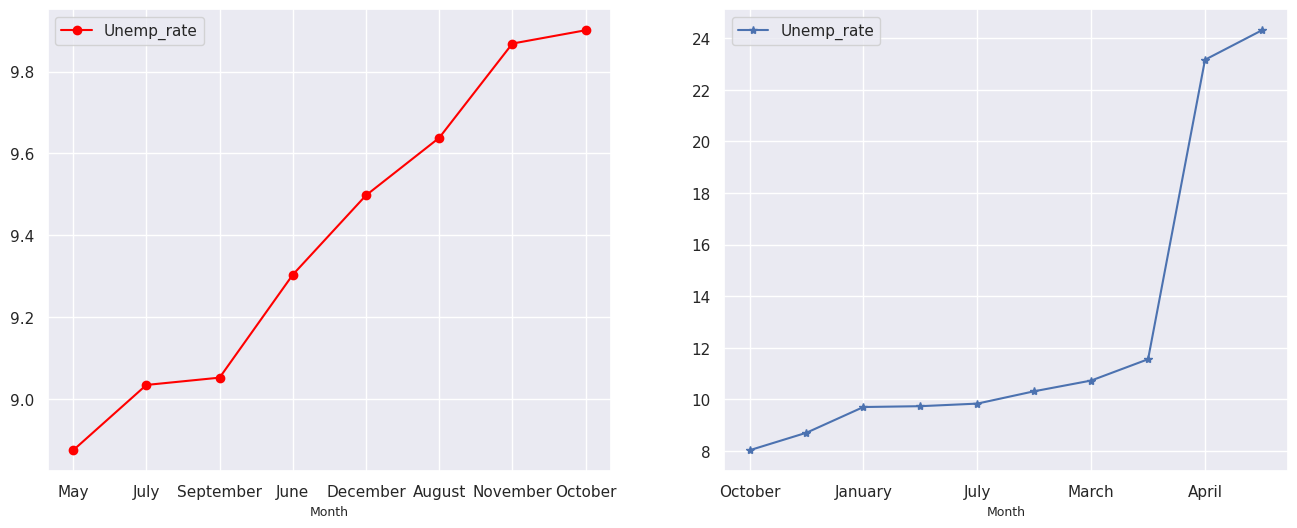

In [169]:
fig,ax = plt.subplots(nrows = 1 , ncols = 2,figsize = (16,6))
y_m_rate.loc[2019].sort_values(by='Unemp_rate',ascending = True).plot(kind = 'line',marker = 'o',color = 'red',ax = ax[0])
y_m_rate.loc[2020].sort_values(by='Unemp_rate',ascending = True).plot(kind = 'line',marker = '*',ax =ax[1])
plt.show()

Sorting the Employed (By Year then By Month)


In [171]:
y_m_employed = total_data.groupby(['Year','Month']).agg({
    'Employed':'mean'
},as_index = False).sort_values(by = 'Employed',ascending = False)

y_m_employed.sort_index(level= 0)

Employed
Year Month                  
2019 August     7.539815e+06
     December   7.377388e+06
     July       7.404425e+06
     June       7.358642e+06
     May        7.410148e+06
     November   7.273661e+06
     October    7.298382e+06
     September  7.739464e+06
2020 April      7.068500e+06
     August     1.442904e+07
     February   1.019882e+07
     January    1.029704e+07
     July       1.441802e+07
     June       9.655845e+06
     March      9.916532e+06
     May        7.827528e+06
     October    1.457998e+07
     September  1.458784e+07

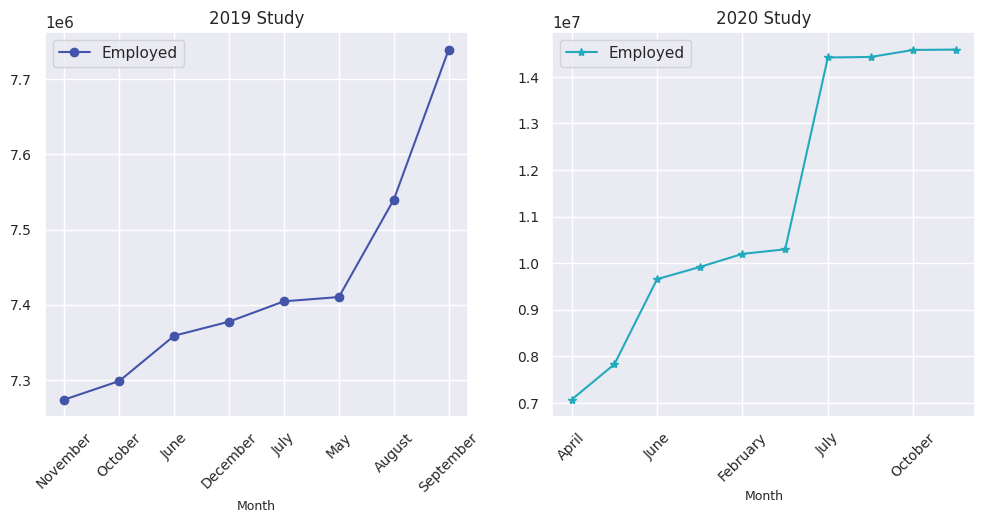

In [172]:
fig,ax = plt.subplots(nrows = 1 , ncols = 2,figsize = (12,5))
y_m_employed.loc[2019].sort_values(by='Employed',ascending = True).plot(kind = 'line',marker = 'o',color = '#4355AA',ax = ax[0])
y_m_employed.loc[2020].sort_values(by='Employed',ascending = True).plot(kind = 'line',marker = '*',ax =ax[1],color = '#23AABD')
for i in ax.flatten():
    i.tick_params(axis='x', labelsize=10)
    i.tick_params(axis='y', labelsize=10)
    i.tick_params(axis='x', rotation=45)
ax[0].set_title("2019 Study")
ax[1].set_title("2020 Study")
plt.show()

**Insights** :




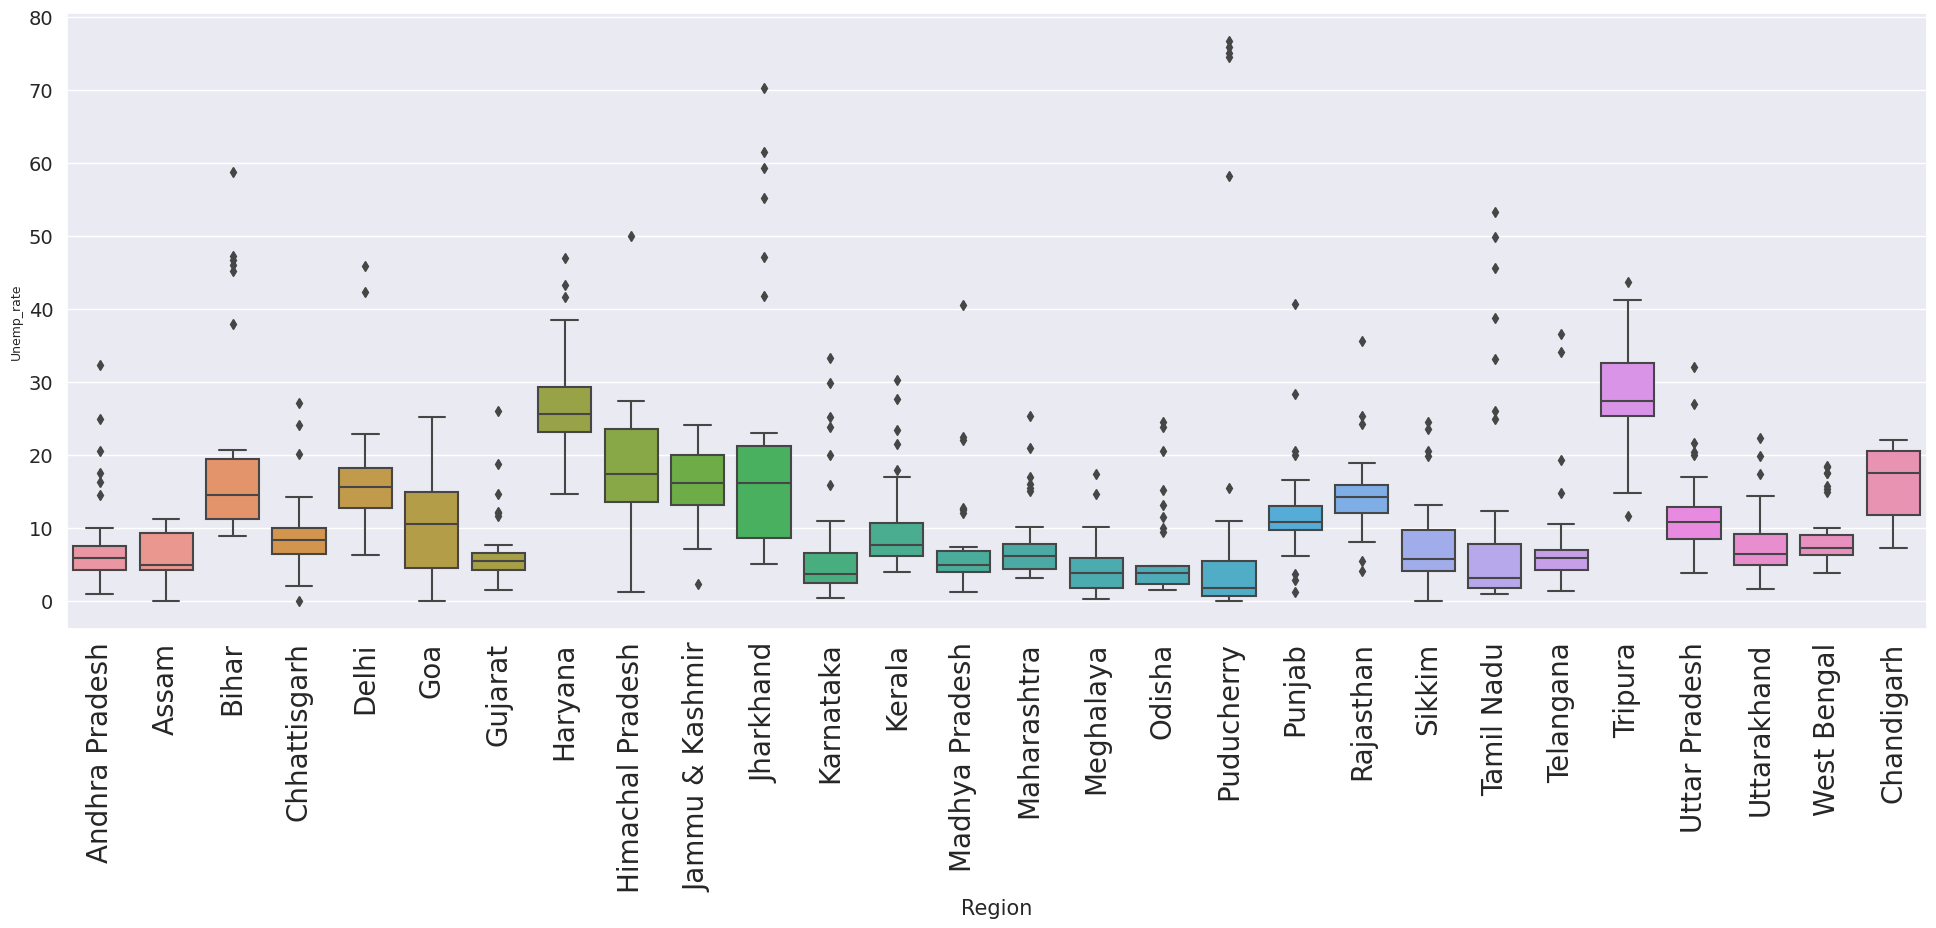

In [180]:
plt.figure(figsize = (24,8))
sns.boxplot(data = total_data , x = 'Region' , y = 'Unemp_rate')
plt.xticks(rotation = 'vertical')
plt.xticks(size = 20)
plt.yticks(size = 14)
plt.xlabel("Region",size = 15)
# sns.set(rc={"xtick.labelsize": 17, "ytick.labelsize": 17})
plt.show()

**Insights**

The unemployment rate in Tripura touched the highest value also it varied a lot in course of 1 year , followed by haryana and HP .

In [84]:
# How serious was Unemployment in the Urbn and rural years for both 2019 and 2020

In [85]:
ue_india.sample(10)

,Region,Date,Frequency,Unemp_rate,Employed,LabourParticipation_rate,Area,Month,Year
65,Delhi,2020-04-30,Monthly,20.69,115487.0,30.21,Rural,April,2020
262,Rajasthan,2019-10-31,Monthly,14.66,15178544.0,42.69,Rural,October,2019
510,Jammu & Kashmir,2019-06-30,Monthly,19.88,1139815.0,45.17,Urban,June,2019
578,Maharashtra,2019-08-31,Monthly,7.57,16602767.0,37.84,Urban,August,2019
426,Chandigarh,2020-06-30,Monthly,7.22,306505.0,33.80,Urban,June,2020
548,Kerala,2019-06-30,Monthly,6.67,4678374.0,37.42,Urban,June,2019
178,Madhya Pradesh,2019-08-31,Monthly,4.94,16559137.0,41.25,Rural,August,2019
428,Chhattisgarh,2019-06-30,Monthly,11.77,2192020.0,45.88,Urban,June,2019
267,Rajasthan,2020-03-31,Monthly,9.47,15059769.0,39.47,Rural,March,2020
674,Tamil Nadu,2019-09-30,Monthly,1.86,11902824.0,37.76,Urban,September,2019


In [182]:
numerics_df = ue_india.groupby(['Area','Year'],as_index = False).agg({
    'Unemp_rate':'mean',
    'Employed':'mean',
    'LabourParticipation_rate':'mean'
})

numerics_df

,Area,Year,Unemp_rate,Employed,LabourParticipation_rate
0,Rural,2019,8.044135,1.049050e+07,45.536779
1,Rural,2020,13.466358,9.782849e+06,42.988212
2,Urban,2019,10.668514,4.548901e+06,42.339054
3,Urban,2020,16.654528,4.164845e+06,38.894025


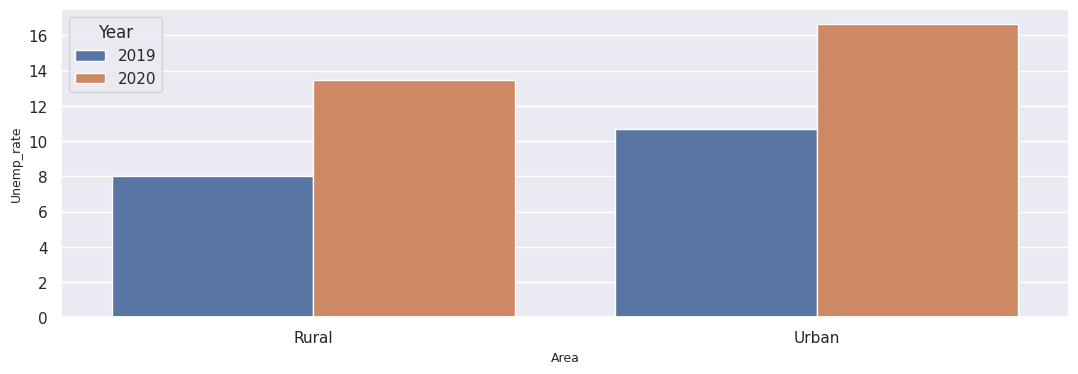

In [183]:
plt.figure(figsize = (13,4))
sns.barplot(x = 'Area', y = 'Unemp_rate',data = numerics_df ,hue= 'Year')
sns.set(rc={"axes.labelsize": 9})
plt.show()

**Insights**

The unemployment rate in the urban area is higher as compared to the rural areas .
This was anticipated as many people who had migrated to the urban area for livelihood lost their jobs .

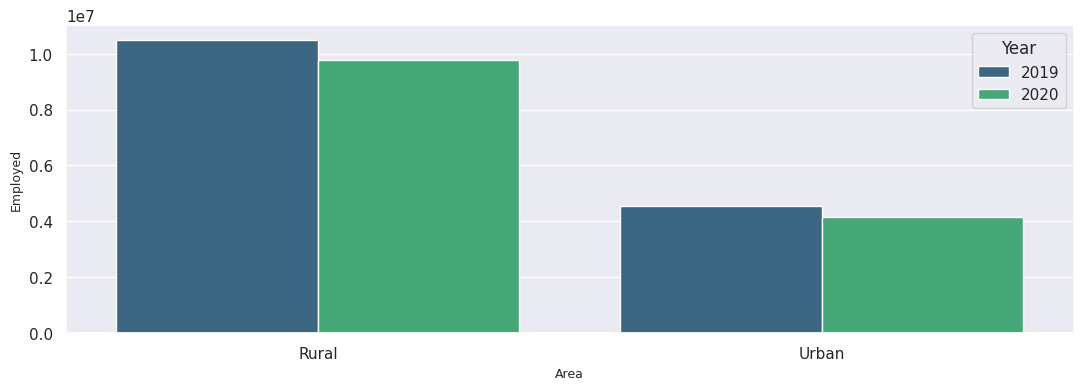

In [184]:
plt.figure(figsize = (13,4))
sns.barplot(x = 'Area', y = 'Employed',data = numerics_df ,hue= 'Year',palette = 'viridis')
sns.set(rc={"axes.labelsize": 9})
plt.show()

**Insights**

There was more employment in rural areas as compared to the urban areas for both 2019 and 2020 .

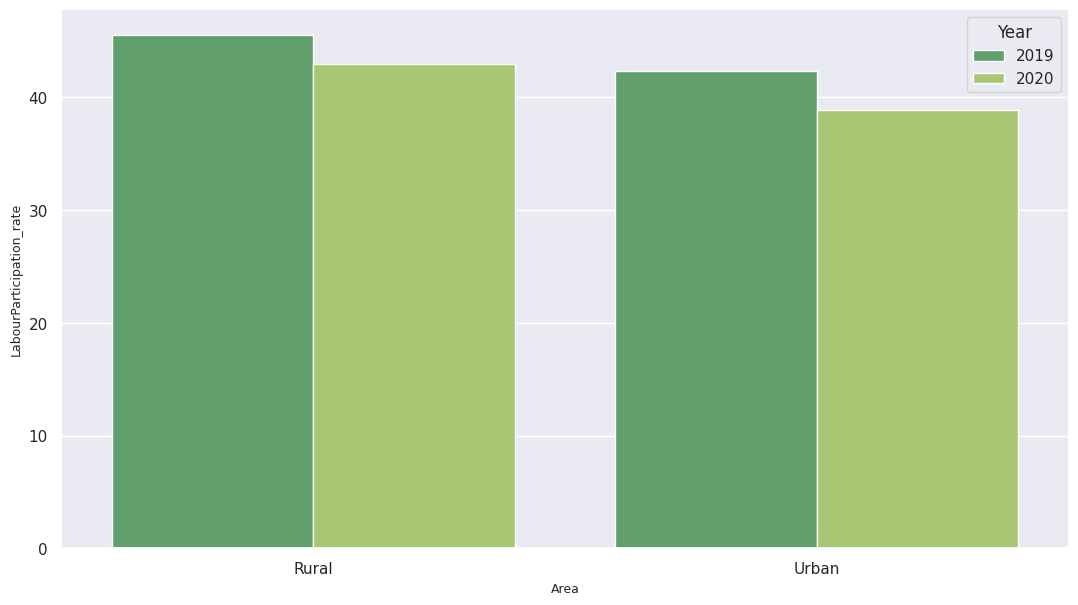

In [185]:
plt.figure(figsize = (13,7))
sns.barplot(x = 'Area', y = 'LabourParticipation_rate',data = numerics_df ,hue= 'Year',palette = 'summer')
sns.set(rc={"axes.labelsize": 9})
plt.show()

Insights

In [186]:
ue_rate.head()

,Region,Date,Frequency,Unemp_rate,Employed,LabourParticipation_rate,Demographic,Lat,Long,Month,Year
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,January,2020
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,February,2020
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,March,2020
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,April,2020
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,May,2020


In [189]:
demographic_df = ue_rate.groupby('Demographic',as_index = False).agg({
    'Unemp_rate':'mean',
    'Employed':'mean',
    'LabourParticipation_rate':'mean'
})

demographic_df

,Demographic,Unemp_rate,Employed,LabourParticipation_rate
0,East,13.916000,1.960237e+07,40.108750
1,North,15.889620,1.307249e+07,38.702658
2,Northeast,10.950263,3.617106e+06,52.055263
3,South,10.454667,1.404059e+07,40.436167
4,West,8.239000,1.862351e+07,41.257000


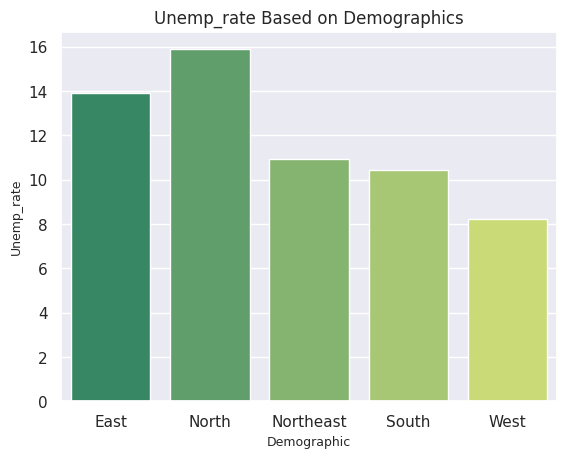

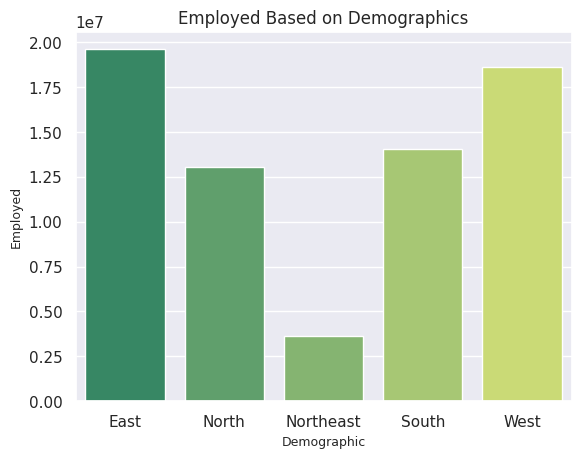

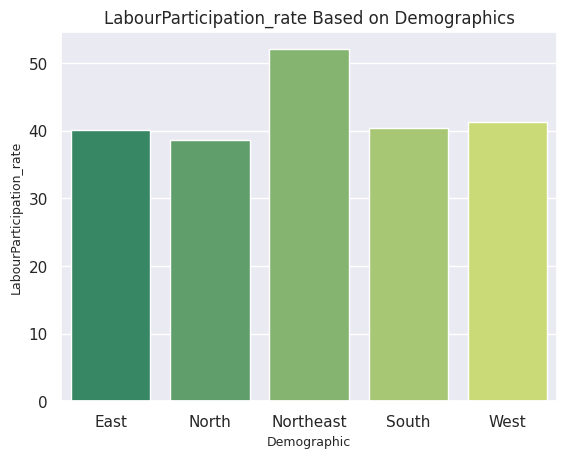

In [196]:
for i in ['Unemp_rate','Employed','LabourParticipation_rate']:
    sns.barplot(x = 'Demographic',y=f'{i}',data=demographic_df ,palette = 'summer')
    plt.title(f"{i} Based on Demographics")
    plt.show()

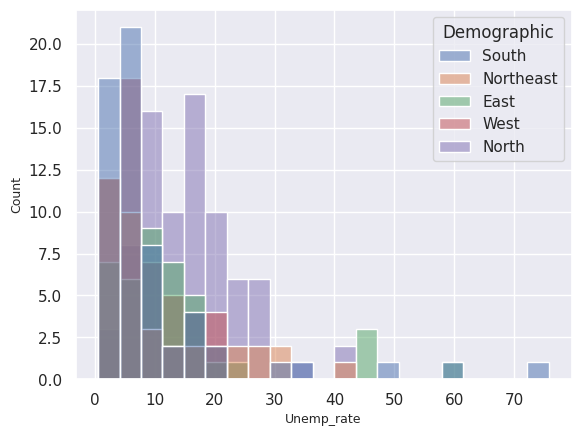

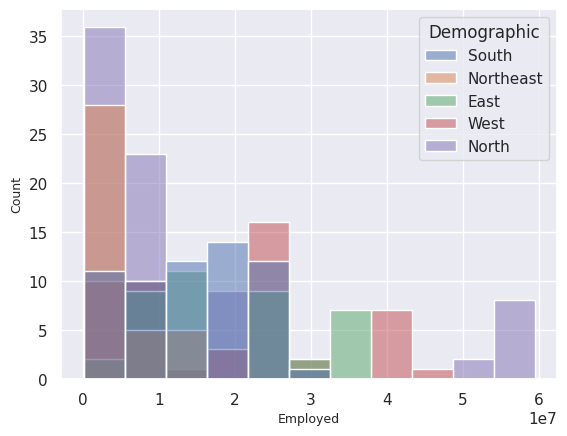

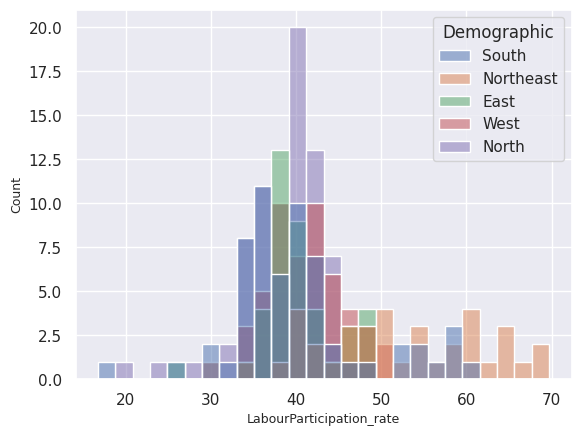

In [192]:

for i in ['Unemp_rate','Employed','LabourParticipation_rate']:
    sns.histplot(x = f'{i}' , data = ue_rate , hue = 'Demographic')
    plt.show()

In [197]:
ue_rate.sample(4)

,Region,Date,Frequency,Unemp_rate,Employed,LabourParticipation_rate,Demographic,Lat,Long,Month,Year
64,Gujarat,2020-05-31,M,12.11,17836936,38.23,West,22.2587,71.1924,May,2020
189,Rajasthan,2020-01-31,M,10.97,20641716,40.51,North,27.0238,74.2179,January,2020
163,Odisha,2020-05-31,M,11.41,11730937,37.04,East,20.9517,85.0985,May,2020
73,Haryana,2020-04-30,M,43.22,5647630,44.38,North,29.0588,76.0856,April,2020


In [198]:
import plotly.express as px

In [199]:
# sunburst graph

df = ue_rate[['Region','Demographic','Unemp_rate']]
figure = px.sunburst(df,path=['Demographic','Region'],values = 'Unemp_rate',width=700,height = 700,color_continuous_scale="turbo",title = "Unemployment Rate in India")
figure.show()

**Insights**



1.   North Region :

*   Haryana
*   Delhi
*   Rajastan

2.  South Region :  

*   Puducherry
*   Tamil Nadu
*   Kerala

3.  East Region :

*   Jharkhand
*   Bihar

4.  West Region

*   Goa
*   Maharastra

5.  North East Region :

*   Tripura
*   Sikkim

















In [204]:
fig = px.bar(total_data ,y = 'Region', x = 'Unemp_rate',animation_frame = 'Month' , color = 'Region',title = "Unemployment Rate for states")
fig.update_layout(yaxis = {'categoryorder':'total descending'})
fig.update_layout(
    width= 1000,
    height = 600
)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig.show()